# Title: [No idea]

## This project aims to brace up my knowledge with Data Science till now, involving the basics DS libraries: Numpy, Pandas e Matplotlib.

The following dataset will be explored:

* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

# Importing Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring data

## Using UNIX to take a look on the data

In [ ]:
!ls ./movielens

In [ ]:
#!head -5 ./movielens/movies.csv
#!head -5 ./movielens/genome-scores.csv
#!head -5 ./movielens/genome-tags.csv
#!head -5 ./movielens/links.csv
#!head -5 ./movielens/ratings.csv
!head -5 ./movielens/tags.csv

# Using Pandas to explore the data

Reading CSVs

In [88]:
movie = pd.read_csv('./movielens/movies.csv', sep=',')
rating = pd.read_csv('./movielens/ratings.csv', sep=',')
#tag = pd.read_csv('./movielens/tags.csv', sep=',')

Timestamp into datetime

In [89]:
rating['datetime'] = pd.to_datetime(rating['timestamp'], unit='s')

Taking a look to the genres

In [90]:
movie_genres = movie['genres'].str.split('|', expand=True)

In [91]:
movie_genres_array = np.array(movie_genres)
movie_genres_single = pd.Series(movie_genres_array.reshape(movie_genres_array.size))

In [92]:
movie_genres_single.value_counts().sort_values(ascending=False)
# There's 19 unique genres

Drama                 25606
Comedy                16870
Thriller               8654
Romance                7719
Action                 7348
Horror                 5989
Documentary            5605
Crime                  5319
(no genres listed)     5062
Adventure              4145
Sci-Fi                 3595
Children               2935
Animation              2929
Mystery                2925
Fantasy                2731
War                    1874
Western                1399
Musical                1054
Film-Noir               353
IMAX                    195
dtype: int64

In [93]:
unique_genres = movie_genres_single.sort_values(ascending=True).unique()[1:-1]
unique_genres
# Excluding '(no genres listed)' and 'None'

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype=object)

Joining movies with ratings datasets

In [94]:
movie_rating = movie.merge(rating[['rating','datetime','movieId']], on='movieId', how='left')
#movie_tag = movie.merge(tag[['tag','timestamp','movieId']], on='movieId', how='left') 

# Possible questions

* Improvement of a genre by the eyes of the users as time passed (avg rating each year/month) - (total = 19 genres)
* behavior of a specific movie since its release 


# Data Cleaning

In [63]:
# Is there any null rating?
movie_rating.isnull().any()

movieId      False
title        False
genres       False
rating        True
timestamp     True
dtype: bool

In [82]:
# Checking if drop rows as a data cleaning method is ok 
# Hypothesis: if they represent just a small part of the dataset, then it is ok to drop them
null_ratings = movie_rating[movie_rating.rating.isnull()].count()
total_rows = movie_rating.count()
r_null_ratings = (null_ratings[0]/total_rows[0])*100

In [65]:
print("Null rating rows represent %.3f %%" %(r_null_ratings))

Null rating rows represent 0.014 %


In [95]:
# Drop the rows in which the rating is null
null_movies = movie_rating[movie_rating.rating.isnull()]
movie_rating.dropna(axis=0, inplace=True)

In [83]:
# Checking if still there is any movie withou a rating
movie_rating.isnull().any()

movieId      False
title        False
genres       False
rating       False
timestamp    False
dtype: bool

## Data Analysis

In [127]:
avg_rating_over_year = pd.DataFrame(index=np.sort(np.array([year for year in movie_rating.datetime.dt.year.unique()])))

In [132]:
# PS: it needs optimization
for genre in unique_genres:
    movie_filter = movie_rating['genres'].str.contains(genre)
    avg_rating_genre = movie_rating[['datetime','rating']][movie_filter].groupby(movie_rating.datetime.dt.year).mean()
    avg_rating_over_year[genre] = avg_rating_genre

In [134]:
avg_rating_over_year

,Comedy,IMAX,Action,Adventure,Animation,Children,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1995,3.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,4.000000,NaN,NaN
1996,3.418091,3.844438,3.436834,3.484267,3.695102,3.505937,3.623384,3.861014,3.704054,3.477083,3.601813,3.523734,3.649818,3.662336,3.604085,3.421680,3.597001,3.958108,3.549002
1997,3.489705,3.859321,3.539046,3.607842,3.657846,3.537464,3.723044,3.752944,3.716291,3.557386,3.859687,3.444433,3.592470,3.684570,3.621753,3.617656,3.523302,3.957718,3.691440
1998,3.435414,3.939785,3.437515,3.513536,3.589627,3.359877,3.631531,3.642392,3.674296,3.445903,3.875066,3.142513,3.571167,3.638387,3.623731,3.432965,3.450822,3.901081,3.591863
1999,3.550452,3.879764,3.451982,3.521106,3.659241,3.478204,3.758653,3.959527,3.760375,3.543013,4.141187,3.295656,3.662105,3.751629,3.689592,3.444986,3.555416,3.959768,3.576530
2000,3.505116,3.887532,3.472949,3.554885,3.694747,3.460486,3.719003,3.915402,3.726755,3.510199,4.098052,3.264864,3.673675,3.687155,3.635263,3.448582,3.511501,3.924855,3.628877
2001,3.451249,3.792148,3.458678,3.531895,3.640184,3.431705,3.692466,3.766415,3.687907,3.502409,4.054145,3.234112,3.625654,3.669240,3.586288,3.402241,3.491578,3.855608,3.624399
2002,3.397025,3.665263,3.395093,3.495392,3.611100,3.375821,3.653086,3.779550,3.644896,3.502647,4.044181,3.192825,3.568970,3.667766,3.536324,3.382764,3.466722,3.778635,3.556774
2003,3.396456,3.538506,3.362266,3.484619,3.604672,3.373630,3.611105,3.739391,3.625553,3.516028,3.998686,3.187194,3.536854,3.619882,3.515271,3.356027,3.439928,3.738829,3.509617
2004,3.336507,3.522790,3.327408,3.423448,3.545914,3.306681,3.561305,3.813692,3.593244,3.458491,3.939987,3.186852,3.473342,3.576998,3.445749,3.307749,3.396896,3.697474,3.491666


In [137]:
avg_rating_over_year.dropna(axis=0,inplace=True)

## Data Visualisation

(1996, 2019)

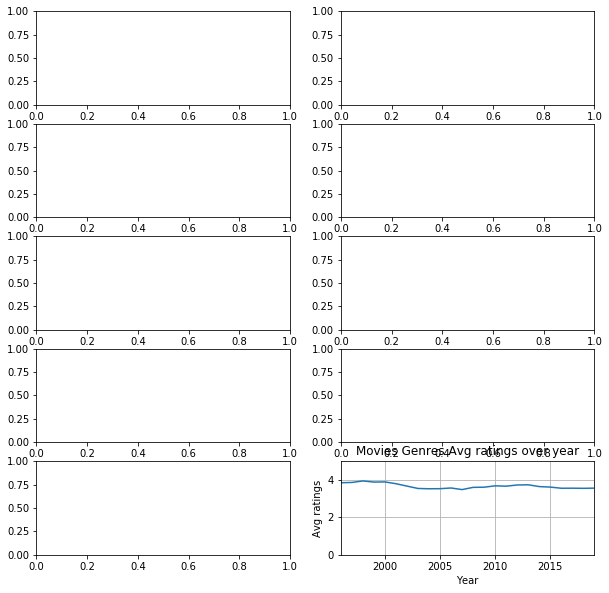

In [176]:
#fig, axs = plt.subplots(5,2,figsize=(10,10))
#plt.figure(figsize=(10,10))
#plt.title('Movies Genres Avg ratings over year')
#plt.plot(avg_rating_over_year.index,avg_rating_over_year.IMAX)

#plt.xlabel('Year')
#plt.ylabel('Avg ratings')
#plt.grid(True)
#plt.ylim([0,5])
#plt.xlim([1996,2019])

